In [2]:
import pandas as pd
import sqlite3 as lite
import collections

con = lite.connect('citi_bike.db')
cur = con.cursor()

In [3]:
df = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY execution_time",con,index_col='execution_time')

In [30]:
hour_change = collections.defaultdict(int)
for col in df.columns:
    station_vals = df[col].tolist()
    station_vals = [0 if v is None else v for v in station_vals]
    station_id = col[1:] #trim the "_"
    station_change = 0
    for k,v in enumerate(station_vals):
        if k < len(station_vals) - 1:
            station_change += abs(station_vals[k] - station_vals[k+1])
    hour_change[int(station_id)] = station_change #convert the station id back to integer

In [20]:
def keywithmaxval(d):
    """Find the key with the greatest value"""
    return max(d, key=lambda k: d[k])

# assign the max key to max_station
max_station = keywithmaxval(hour_change)

In [21]:
print(max_station)

293


In [32]:
import datetime

cur.execute("SELECT id, stationname, latitude, longitude FROM citibike_reference WHERE id = ?", (max_station,))
data = cur.fetchone()
print("The most active station is station id %s at %s latitude: %s longitude: %s " % data)
print("With %d bicycles coming and going in the hour between %s and %s" % (
    hour_change[max_station],
    datetime.datetime.fromtimestamp(int(df.index[0])).strftime('%Y-%m-%dT%H:%M:%S'),
    datetime.datetime.fromtimestamp(int(df.index[-1])).strftime('%Y-%m-%dT%H:%M:%S'),
))

The most active station is station id 293 at Lafayette St & E 8 St latitude: 40.73028666 longitude: -73.9907647 


ValueError: invalid literal for int() with base 10: '2016-05-11 13:27:37'

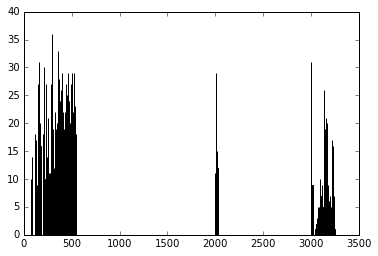

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(hour_change.keys(), hour_change.values())
plt.show()